In [1]:
%pip install aitk.networks --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
import aitk.networks
aitk.networks.__version__

'0.0.9'

### Testing aitk networks

Trying an auto-encoder with one-hot vectors of length 8

In [2]:
import numpy as np

In [3]:
def one_hot(n):
    data = []
    for i in range(n):
        pattern = [0]*n
        pattern[i] = 1
        data.append(pattern)
    return np.array(data)

In [4]:
patterns = one_hot(8)

In [5]:
patterns.shape

(8, 8)

In [6]:
patterns

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [7]:
def build_model():
    net = aitk.networks.SimpleNetwork(
        8, (3, "sigmoid"), (8, "softmax"), 
        loss = "categorical_crossentropy",
        metrics = ["tolerance_accuracy"]
        )
    net.set_config_layer("input", colormap=("gray",0,1))
    net.set_learning_rate(0.1)
    net.set_momentum(0.0)
    return net

In [8]:
net = build_model()
net.set_tolerance(0.2)

In [9]:
history = net.fit(
    patterns, patterns, 
    batch_size=1, 
    shuffle=True,
    epochs=600, 
    accuracy=1.0, 
    patience=30, 
    report_rate=10,
)

Epoch 600/600 loss: 0.15288349986076355 - tolerance_accuracy: 0.875



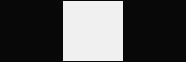

press enter 


In [10]:
for i in range(len(patterns)):
    net.display_picture(patterns[i])
    x = input("press enter")

In [11]:
 for i in range(len(patterns)):
    print(" ".join(["%.2f" % f for f in net.predict([patterns[i]])[0]]))

0.82 0.03 0.03 0.00 0.00 0.00 0.12 0.00
0.05 0.92 0.00 0.00 0.00 0.02 0.00 0.00
0.02 0.00 0.89 0.05 0.00 0.03 0.01 0.00
0.00 0.00 0.04 0.90 0.03 0.00 0.01 0.02
0.00 0.00 0.00 0.02 0.82 0.00 0.15 0.00
0.00 0.02 0.04 0.00 0.00 0.92 0.00 0.01
0.13 0.00 0.02 0.01 0.12 0.00 0.72 0.00
0.00 0.00 0.00 0.02 0.00 0.03 0.00 0.94


In [12]:
net.predict_to(patterns, "hidden")

array([[0.8214643 , 0.03316292, 0.9791775 ],
       [0.02487424, 0.04790437, 0.9387346 ],
       [0.870633  , 0.9256792 , 0.93914974],
       [0.9644295 , 0.96023095, 0.10472104],
       [0.776697  , 0.10593325, 0.01236877],
       [0.02981555, 0.9606672 , 0.94878066],
       [0.9561715 , 0.03826618, 0.45133442],
       [0.04616514, 0.9445632 , 0.03461236]], dtype=float32)